In [53]:
import pandas as pd
import numpy as np
import pylab as pl
from pandas import DataFrame
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sebscho/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'axes', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
results = pd.read_csv('mobile_response_041418.csv')
print (len(results))

31


In [59]:
# rename columns 
results.columns = ['timestamp', 'everyday_items', 'clothes_electronics', 'meal_delivery', 'games', 
                'dating', 'tickets', 'rideshare', 'name', 'email']
results.head(5)


,timestamp,everyday_items,clothes_electronics,meal_delivery,games,dating,tickets,rideshare,name,email
0,4/2/2018 17:25:48,At home,At home,At work,Commute,Never,Commute,At home,NaN,NaN
1,4/4/2018 14:09:51,At home,At home,Commute,Commute,Never,Commute,"Leaving home, In areas with few public transit...",NaN,NaN
2,4/4/2018 14:37:25,Other,Never,Never,Never,Never,At work,"Leaving home, Leaving work, In areas far from ...",ella@grandcentraltech.com,NaN
3,4/4/2018 14:46:25,Never,At home,At home,Commute,At home,At home,"Leaving home, In areas far from home, or in a ...",NaN,NaN
4,4/4/2018 15:59:52,Other,At home,At home,Commute,At home,At home,"Leaving home, To replace a daily commute, In a...",NaN,NaN


In [60]:
# drop unnecessary columns
results = results.drop(['timestamp','name', 'email'], axis=1)

In [61]:
# create array for loop
iap_type = np.array(['everyday_items', 
                     'clothes_electronics', 'meal_delivery', 'games', 'dating', 'tickets', 
                     'rideshare'])

In [62]:
# create dictionary for names
names = {}
# define cat as question answer options
cat =  results.clothes_electronics.unique()

In [63]:
labels = results.columns[:-2]
labels

Index(['everyday_items', 'clothes_electronics', 'meal_delivery', 'games',
       'dating'],
      dtype='object')

In [64]:
for i in labels:
    names[i] = 0

In [65]:
names

{'clothes_electronics': 0,
 'dating': 0,
 'everyday_items': 0,
 'games': 0,
 'meal_delivery': 0}

In [66]:
for i in names.keys():
    vals = []
    for j in cat:
        vals.append(results[results[i] == j][i].count())
        names[i] = vals

In [67]:
# change results to dataframe, index with categories
names_df = pd.DataFrame(names, index=cat)
names_df

,clothes_electronics,dating,everyday_items,games,meal_delivery
At home,18,8,14,4,17
Never,10,18,13,14,10
At work,1,2,0,0,1
Other,1,1,3,0,0
Commute,1,2,1,13,3


Text(0.5,1,'dating')

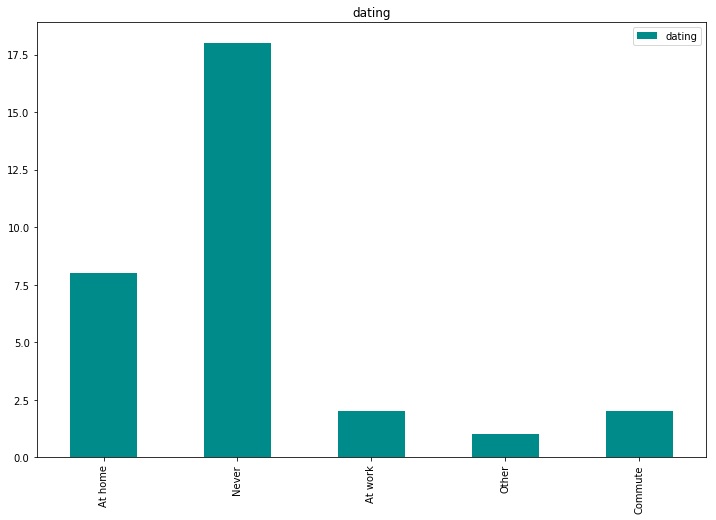

In [114]:
# plotting just one item, in two ways
names_df.plot.bar(y = 'dating', figsize=(12,8), color='darkcyan')
plt.title('dating')
# ax = names_df['dating'].plot(kind='bar', title ="an item", figsize=(15, 10), legend=True, fontsize=12)

In [101]:
# define function for plotting each item
def plotChart (dataset, attribute, axes, color):  
    return dataset.plot.bar(y = attribute, ax=axes, color=color, figsize=(11,10))
    ax.legend_.remove()

#     ax.legend(loc='best', fancybox=True, framealpha=0.5)
#     ax.set_title(attribute)

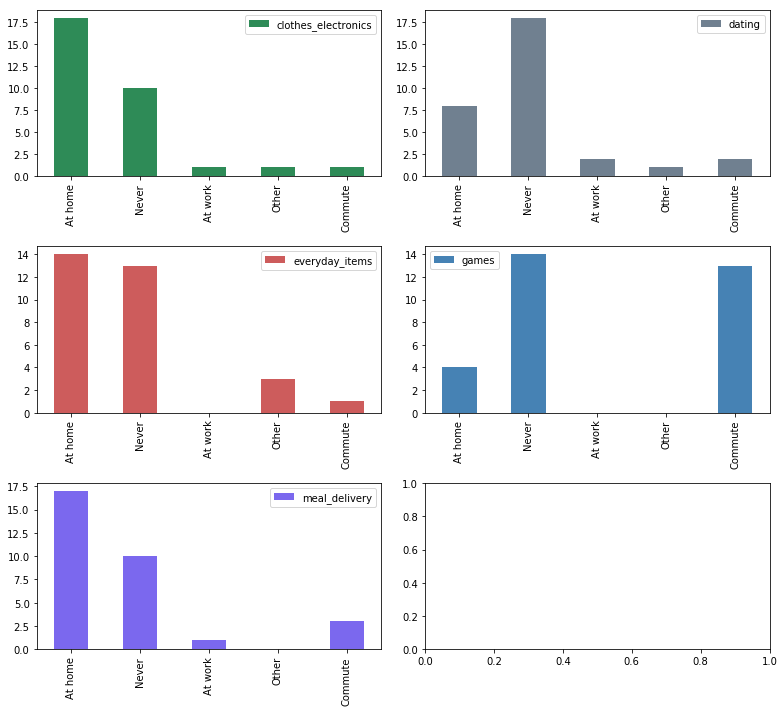

In [102]:
columns = ['clothes_electronics', 'dating', 'everyday_items', 'games',
       'meal_delivery']

colors = ['seagreen', 'slategrey', 'indianred', 'steelblue', 'mediumslateblue']

fig, axes = plt.subplots(3,2)
axes=axes.flatten()
    
for i in range(len(columns)):
    plotChart(names_df, i, axes[i], colors[i])
#     plt.title(columns[i])
    fig.tight_layout()


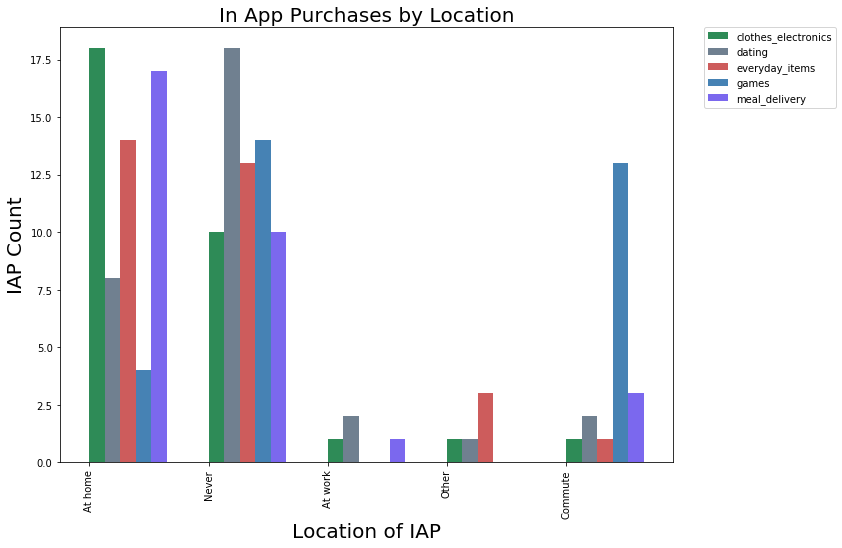

In [105]:
# plot all types by location
names_df.plot.bar(figsize=(11,8), align='edge', width=.65, color=colors)
plt.title('In App Purchases by Location', fontsize=20)
plt.xlabel('Location of IAP', fontsize=20)
plt.ylabel('IAP Count', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10, frameon=True)